# Exploratory Data Analysis

Libraries:

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Import

Overall there are six different columns:

- Age
- Sex
- Blood Pressure Levels (BP)
- Cholesterol Levels
- Sodium (Na) to Potassium Ratio
- Drug Type

The goal is to predict the drug type, given the other features.

In [80]:
data = pd.read_csv("data.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


There are 200 different patients.

In [81]:
len(data)

200

## Data Wrangling

Tidy *Drug* column.

In [82]:
data["Drug"] = data["Drug"].replace(r"[Dd]rug", "", regex=True)

Change order of BP.

In [83]:
order = ["LOW", "NORMAL", "HIGH"]
data["BP"] = pd.Categorical(data["BP"], categories = order, ordered = True)

## Single features

### Age

In [84]:
data["Age"].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

Age data is uniformly distributed.

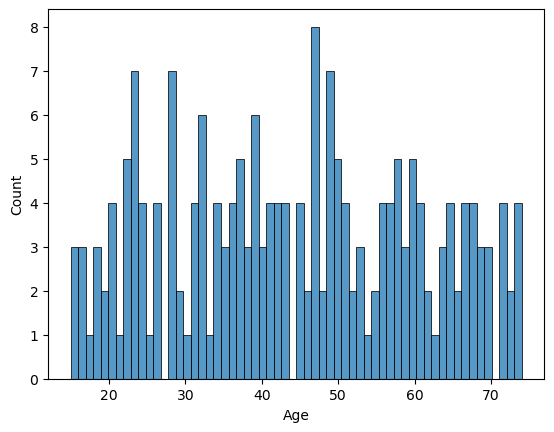

In [85]:
sns.histplot(data["Age"], bins= 74 - 14)
plt.show()

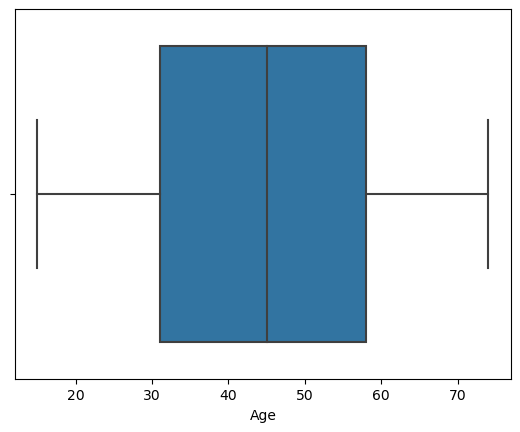

In [86]:
sns.boxplot(x=data["Age"])
plt.show()

### Sex

There are slightly more men than women in the dataset.

In [87]:
data["Sex"].value_counts()

M    104
F     96
Name: Sex, dtype: int64

### Blood Pressure Levels

High blood pressure levels are the most frequent. followed by low and normal.

In [88]:
data["BP"].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

### Cholesterol

High cholesterol levels appear slightly more frequent than normal ones.

In [89]:
data["Cholesterol"].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

### Sodium to Potassium Ratio

In [90]:
data["Na_to_K"].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

The sodium to potassium ratio is right-skewed. The skew value is positive.

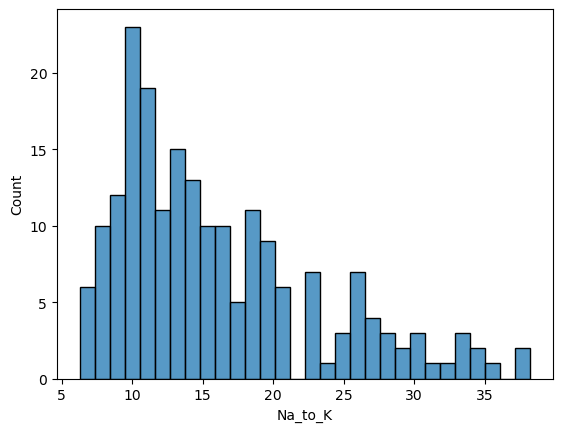

In [91]:
sns.histplot(data["Na_to_K"], bins=30)
plt.show()

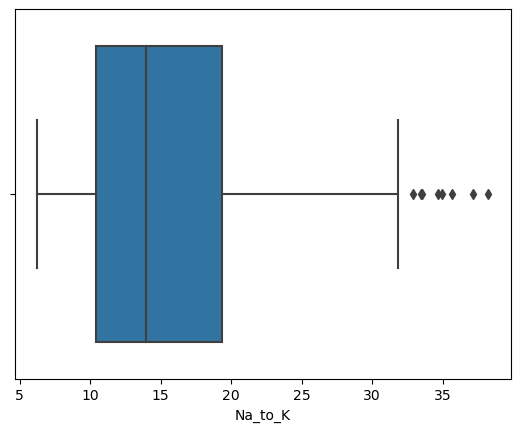

In [92]:
sns.boxplot(x=data["Na_to_K"])
plt.show()

In [93]:
data["Na_to_K"].skew()

1.039341186028881

### Drug Type

Drug Y appears by far the most often, followed by drug X. Drugs A, C and B appear even less.

In [94]:
data["Drug"].value_counts()

Y    91
X    54
A    23
C    16
B    16
Name: Drug, dtype: int64

## Dual features

### Age & Sex

Men are older in this dataset.

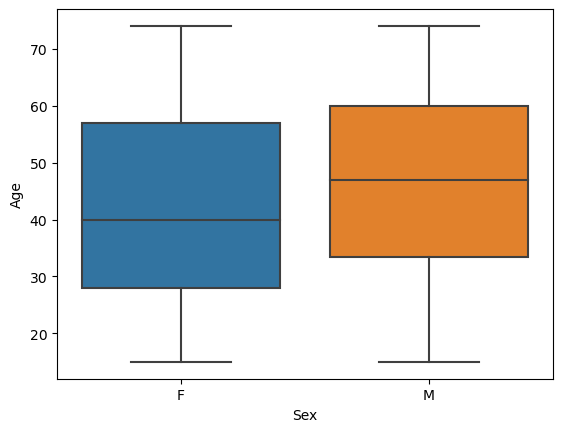

In [95]:
sns.boxplot(x=data["Sex"], y=data["Age"])
plt.show()

### Age & BP

People with high blood pressure levels are younger.

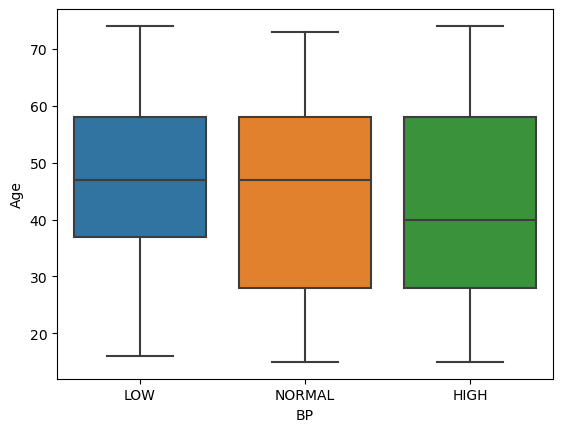

In [96]:
sns.boxplot(x=data["BP"], y=data["Age"])
plt.show()

### Age & Cholesterol

People with high cholesterol levels are older, however the variance is larger.

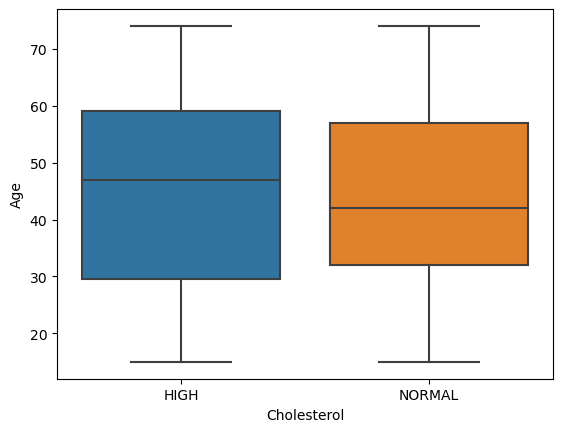

In [97]:
sns.boxplot(x=data["Cholesterol"], y=data["Age"])
plt.show()

### Age & Na_to_K

There is no correlation between age and sodium to potassium ratio.

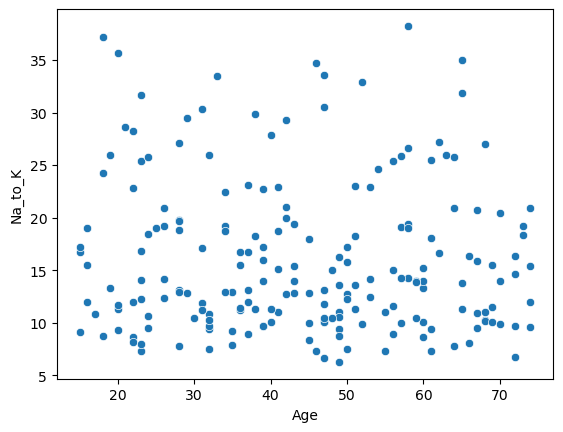

In [98]:
sns.scatterplot(x=data["Age"], y=data["Na_to_K"])
plt.show()

In [99]:
np.corrcoef(data["Age"], data["Na_to_K"])

array([[ 1.       , -0.0631195],
       [-0.0631195,  1.       ]])

### Age & Drug

Drug B is only consumed by people older than 50.

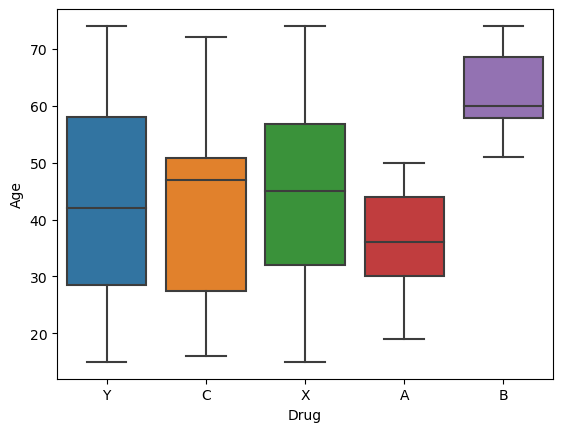

In [100]:
sns.boxplot(x=data["Drug"], y=data["Age"])
plt.show()

Drug type has a significant influence on Age.

In [101]:
model = ols('Age ~ Drug', data=data).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

### Sex & BP

The ratio for high blood pressure levels is slightly higher for women than for men.

<AxesSubplot:xlabel='Sex', ylabel='count'>

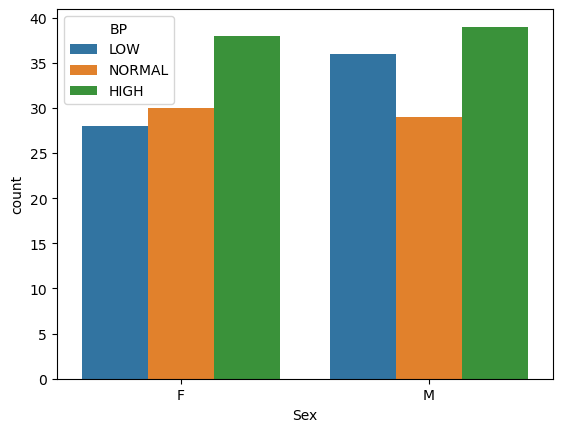

In [103]:
sns.countplot(x=data["Sex"], hue=data["BP"])

<AxesSubplot:xlabel='BP', ylabel='Sex'>

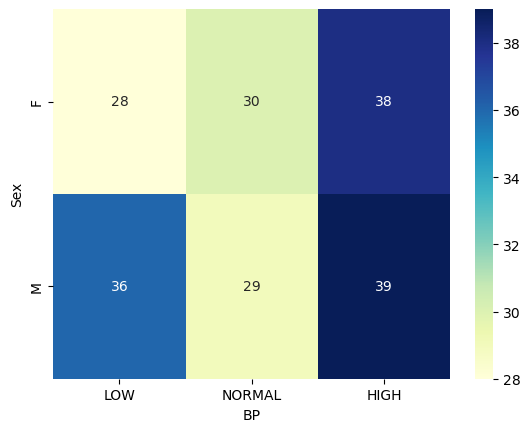

In [104]:
cross_tab = pd.crosstab(data['Sex'], data['BP'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')

In [105]:
38/96

0.3958333333333333

In [106]:
39/104

0.375

### Sex & Cholesterol

There are no significant differences between the sexes.

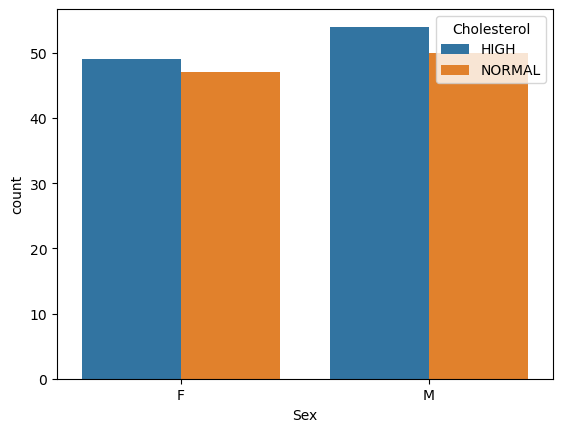

In [107]:
sns.countplot(x=data["Sex"], hue=data["Cholesterol"])
plt.show()

### Sex & Na_to_K

Females have a slightly higher sodium to potassium ratio in this dataset.

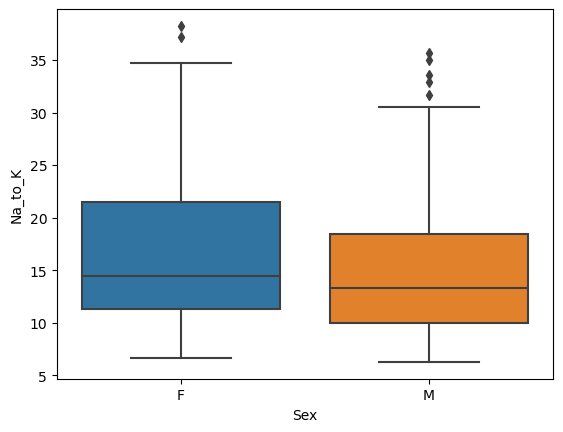

In [108]:
sns.boxplot(x = data["Sex"], y = data["Na_to_K"])
plt.show()

### Sex & Drug

Drug Y is used more with females and drug X is used equally. The others are more frequent in men.

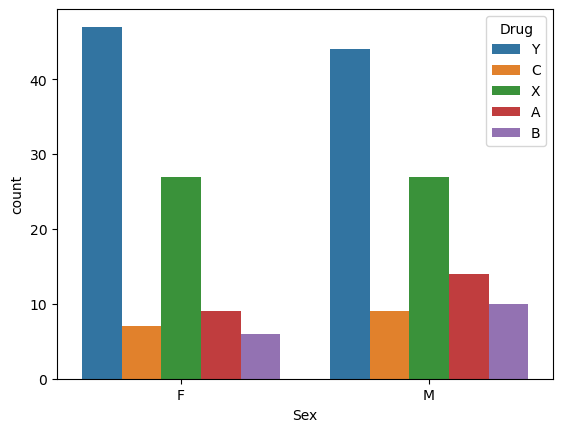

In [109]:
sns.countplot(x=data["Sex"], hue=data["Drug"])
plt.show()

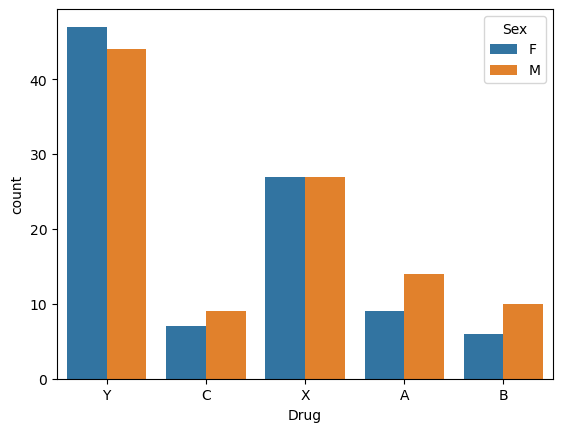

In [110]:
sns.countplot(hue=data["Sex"], x=data["Drug"])
plt.show()

### BP & Cholesterol

People with normal blood pressure levels have high Cholesterol levels. People with high blood pressure levels have normal Cholesterol levels.

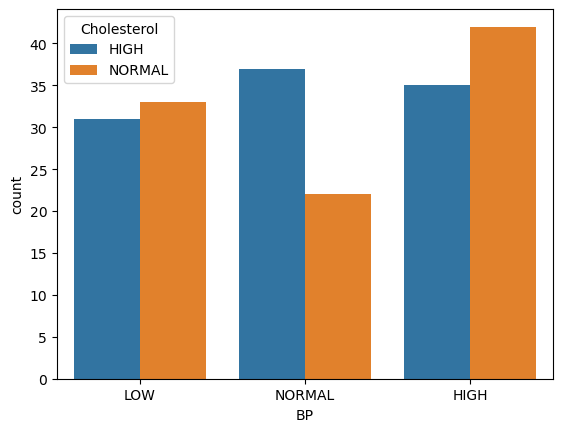

In [111]:
sns.countplot(x = data["BP"], hue = data["Cholesterol"])
plt.show()

Generall speaking, eople with low Cholesterol levels either have low or high blood pressure levels

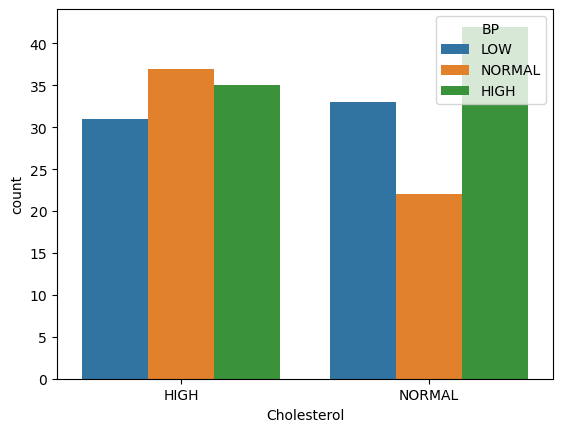

In [112]:
sns.countplot(hue = data["BP"], x = data["Cholesterol"])
plt.show()

### BP & Na_to_K

Normal blood pressure levels leas to slightly lower sodium to potassium ratios.

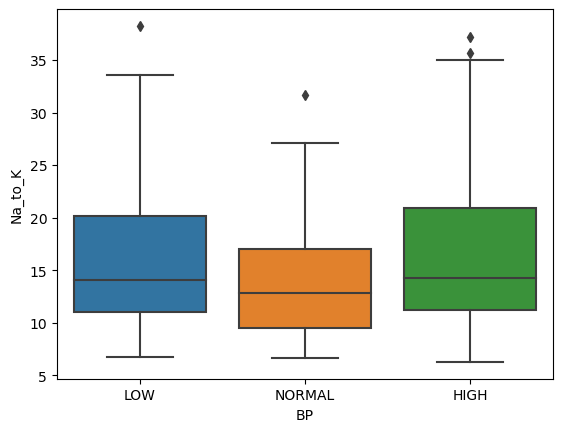

In [113]:
sns.boxplot(x = data["BP"], y = data["Na_to_K"])
plt.show()

### BP & Drug

There are tremendous insights here!
Drugs A and B are only consumed by patients with high blood pressure levels, whereas drug C is only consumed by patients with low blood pressure levels. Drug X is only taken by patients with low or normal blood pressure levels (with more being in the group normal). Drug Y is consumed by all, with high bp being the most frequent, followed by low and normal.

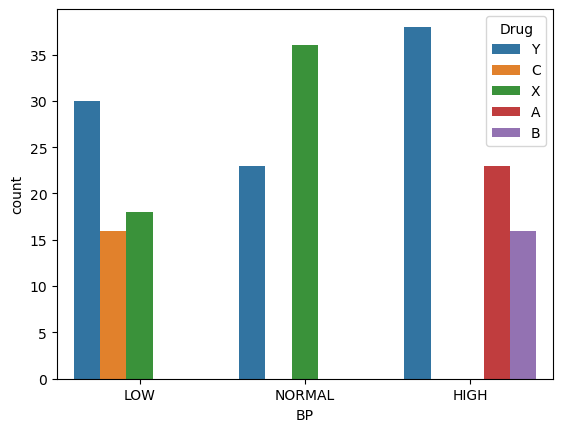

In [114]:
sns.countplot(x=data["BP"], hue=data["Drug"])
plt.show()

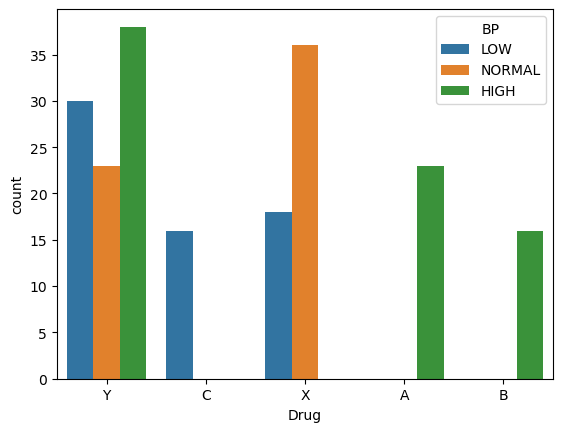

In [115]:
sns.countplot(hue=data["BP"], x=data["Drug"])
plt.show()

### Cholesterol & Na_to_K

No insight here.

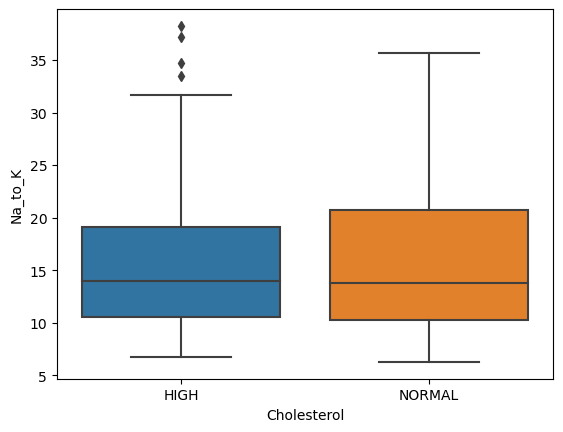

In [117]:
sns.boxplot(x = data["Cholesterol"], y = data["Na_to_K"])
plt.show()

### Cholesterol & Drug

Drug C is only consumed when the patient has high cholesterol. Drug X is consumed more often by patients with normal cholesterol.

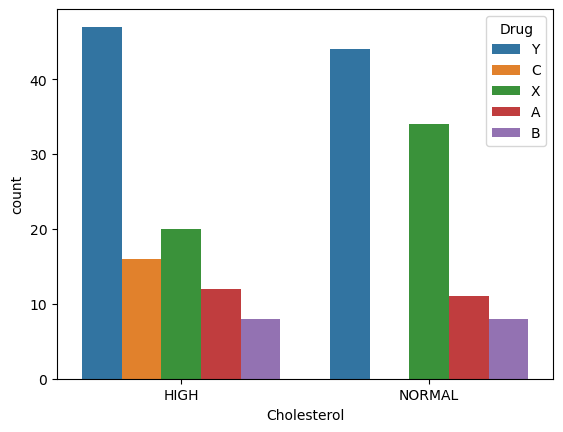

In [121]:
sns.countplot(x = data["Cholesterol"], hue = data["Drug"])
plt.show()

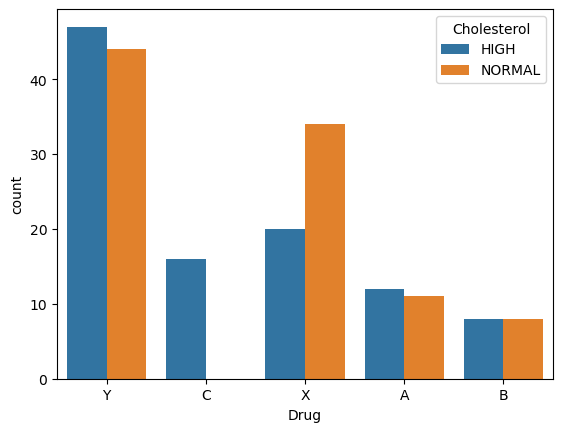

In [122]:
sns.countplot(hue = data["Cholesterol"], x = data["Drug"])
plt.show()

### Na_to_K & Drug

High sodium to potassium ratio leads to drug Y.

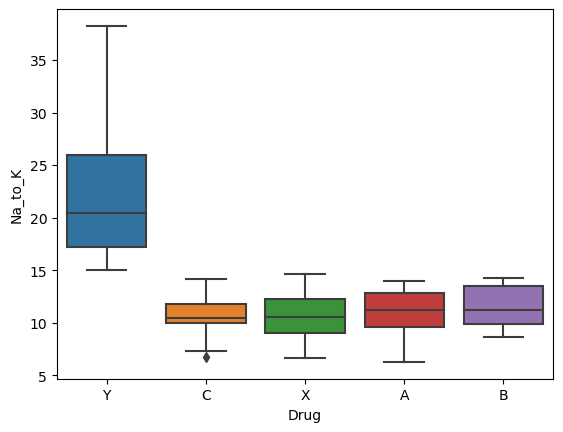

In [123]:
sns.boxplot(x = data["Drug"], y = data["Na_to_K"])
plt.show()

This hypothesis is significant.

In [124]:
model = ols('Age ~ Drug', data=data).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

             df       sum_sq      mean_sq         F   PR(>F)
Drug        4.0   7018.37801  1754.594502  7.210544  0.00002
Residual  195.0  47450.77699   243.337318       NaN      NaN


### Summary

When comparing dual variables, all features influence the drug type:
- Age: drug B is only consumed by old people. Drug A not at all.
- Sex: drug Y consumed more by females. However relationship is not strong.
- BP: drugs A and B only consumed by high BP, drug C only consumed by low BP. High BP don't use drug X at all. This relationship is the most important.
- Cholesterol: drug C is only consumed when cholesterol is high.
- Na_to_K: high ratio ( > 15) leads to drug Y.

## Triple features

The motivation is to try to gain new insights from the previous summary.

### Age & BP & Drug

For people older than 50 with high bp drug B is used more often than drug Y (which is not the case when age is irrelevant).

In [125]:
old = data.loc[data["Age"] > 50,]
old

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
4,61,F,LOW,HIGH,18.043,Y
8,60,M,NORMAL,HIGH,15.171,Y
13,74,F,LOW,HIGH,20.942,Y
16,69,M,LOW,NORMAL,11.455,X
20,57,M,LOW,NORMAL,19.128,Y
...,...,...,...,...,...,...
190,58,M,HIGH,HIGH,18.991,Y
192,72,M,LOW,HIGH,16.310,Y
193,72,M,LOW,HIGH,6.769,C
195,56,F,LOW,HIGH,11.567,C


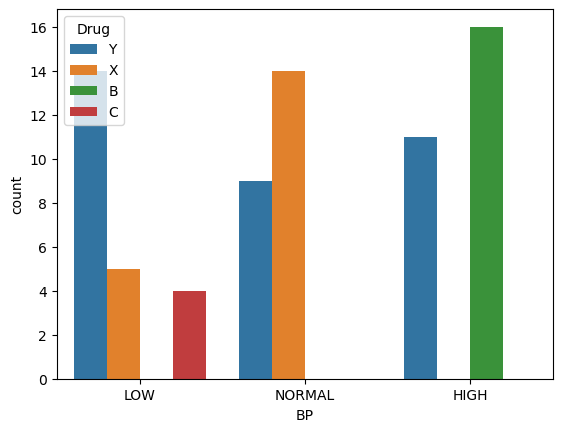

In [126]:
sns.countplot(x=old["BP"], hue=old["Drug"])
plt.show()

### BP & Cholesterol & Drug

For people with low bp
- Drug C is only used by people with highcholesterol
- Drug X is only used by people with normal cholesterol

In [127]:
low = data.loc[data["BP"] == "LOW", ]
low

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,47,M,LOW,HIGH,13.093,C
2,47,M,LOW,HIGH,10.114,C
4,61,F,LOW,HIGH,18.043,Y
7,41,M,LOW,HIGH,11.037,C
9,43,M,LOW,NORMAL,19.368,Y
...,...,...,...,...,...,...
192,72,M,LOW,HIGH,16.310,Y
193,72,M,LOW,HIGH,6.769,C
195,56,F,LOW,HIGH,11.567,C
196,16,M,LOW,HIGH,12.006,C


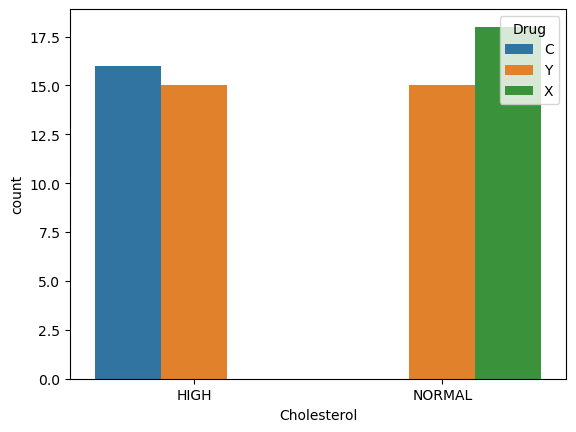

In [128]:
sns.countplot(x=low["Cholesterol"], hue=low["Drug"])
plt.show()